Check the individual steps of starfit
=====================================

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pysunnc as ps
import os
from astropy.io import ascii
from astropy.table import Table
import pypopfit

In [121]:
iso_filename='../zziso/iso.dat'
cat_filename='../zzcat/cat1.dat'

DM=30.0

gal_Av=0.2
int_Av=0.3

bands=['F275W', 'F336W', 'F438W', 'F555W', 'F625W', 'F814W']

gal_coeff={'F275W': 1.989, 'F336W': 1.633, 'F438W': 1.332,
           'F555W': 0.989, 'F625W': 0.866, 'F814W': 0.578}
int_coeff={'F275W': 1.989, 'F336W': 1.633, 'F438W': 1.332,
           'F555W': 0.989, 'F625W': 0.866, 'F814W': 0.578}
lims={'F275W': 26.50, 'F336W': 27.00, 'F438W': 27.50,
      'F555W': 27.80, 'F625W': 28.00, 'F814W': 28.00}

LAs=np.around(np.arange(6.6, 7.6, 0.01), 3)
Avs=np.around(np.arange(0.0, 1.0, 0.01), 3)

In [3]:
iso=ascii.read(iso_filename)
magtab=ascii.read(cat_filename)

**get_isochrones**

In [4]:
pts, interps = pypopfit.get_isochrones(iso, LAs, bands=bands,
                                       DM=DM, gal_Av=gal_Av, gal_coeff=gal_coeff)

In [5]:
print(len(pts))

100


In [6]:
for ii in range(len(pts)): print(pts[ii][0]['logAge'], end=' ')

6.6 6.61 6.62 6.63 6.64 6.65 6.66 6.67 6.68 6.69 6.7 6.71 6.72 6.73 6.74 6.75 6.76 6.77 6.78 6.79 6.8 6.81 6.82 6.83 6.84 6.85 6.86 6.87 6.88 6.89 6.9 6.91 6.92 6.93 6.94 6.95 6.96 6.97 6.98 6.99 7.0 7.01 7.02 7.03 7.04 7.05 7.06 7.07 7.08 7.09 7.1 7.11 7.12 7.13 7.14 7.15 7.16 7.17 7.18 7.19 7.2 7.21 7.22 7.23 7.24 7.25 7.26 7.27 7.28 7.29 7.3 7.31 7.32 7.33 7.34 7.35 7.36 7.37 7.38 7.39 7.4 7.41 7.42 7.43 7.44 7.45 7.46 7.47 7.48 7.49 7.5 7.51 7.52 7.53 7.54 7.55 7.56 7.57 7.58 7.59 

In [7]:
print(pts[0])
print(pts[-1])

logAge      Mini     F275Wmag F336Wmag F438Wmag F555Wmag F625Wmag F814Wmag
------ ------------- -------- -------- -------- -------- -------- --------
   6.6  0.0900000036   49.442    45.74   44.888   43.889   42.704   39.467
   6.6  0.0921573043    49.56   45.775   44.987   43.987    42.79   39.476
   6.6  0.1055688262   49.202   45.442   44.566   43.532   42.368    39.21
   6.6  0.1138553619   48.995   45.242   44.325   43.276    42.13   39.057
   6.6  0.1212434694   48.904   45.156   44.187   43.112   41.977   38.964
   6.6  0.1292994469   48.666   44.937   43.933   42.846   41.729   38.798
   6.6  0.1373417675   48.589   44.933   43.839   42.694   41.587   38.691
   6.6  0.1434380412   48.527   44.937   43.768   42.573   41.474   38.607
   6.6  0.1516868621   48.409   44.922   43.653   42.393   41.306   38.476
   6.6  0.1597592235   48.346   44.936   43.578   42.261   41.184   38.381
   6.6  0.1662296355    48.25   44.851   43.458   42.118   41.049   38.287
   ...           ...     

In [8]:
# interpolation
print(interps[0]['F814W']([0.0900000000, 0.0900000036, 64.2537307739, 64.2537307740]))
print(interps[-1]['F625W']([0.0900000000, 0.0900000036, 8.2327852249, 8.2327852250]))

[99.999 39.467 14.238 99.999]
[99.999 44.074 25.234 99.999]


**get_ABC_maxMs**

In [9]:
AAs, BBs, CC0, maxMs = pypopfit.get_ABC_maxMs(pts, alpha=-2.35,
                                              minStellarMass=0.08,
                                              maxStellarMass=100)

In [10]:
# maxMs
print(maxMs[0], maxMs[-1])

64.2537307739 8.2327852249


In [11]:
# ABC

def getABC(alpha, Mmin, Mmax):
    return (Mmax**(alpha+1)-Mmin**(alpha+1))/(alpha+1)

print(AAs[0], BBs[0], CC0)
print(getABC(-2.35, 0.08, 64.2537307739),
      getABC(-2.35, 64.2537307739, 100),
      getABC(-2.35, 0.08, 100))

print(AAs[-1], BBs[-1], CC0)
print(getABC(-2.35, 0.08, 8.2327852249),
      getABC(-2.35, 8.2327852249, 100),
      getABC(-2.35, 0.08, 100))

22.41004410424928 0.0012073937547434355 22.411251498004024
22.41004410424926 0.0012073937547602506 22.41125149800402
22.369708710843554 0.041542787160469885 22.411251498004024
22.36970871084356 0.0415427871604606 22.41125149800402


**cut_interp_isochrone**

In [79]:
ii=40
jj=4
pt0=pts[ii]
obs=magtab[jj]

In [80]:
newpt1, newpt2 = pypopfit.cut_interp_isochrone(pt0, interps[ii],
                                               bands=bands, obs=obs, dmag_min=0.01)

In [81]:
print(len(pt0), np.amin(pt0['Mini']), np.amax(pt0['Mini']))
print(len(newpt1), np.amin(newpt1['Mini']), np.amax(newpt1['Mini']))
print(len(newpt2), np.amin(newpt2['Mini']), np.amax(newpt2['Mini']))

334 0.0900000036 19.3023433685
1079 18.0848178864 19.3023433685
1725 0.0900000036 19.3023433685


In [82]:
for bd in bands:
    print(round(obs[bd+'mag']+5*obs[bd+'err']+2.5*np.log10(2), 3), newpt1[0][bd+'mag'])

23.942 22.451
23.808 22.588
23.761 23.368
23.558 23.378
23.458 23.389
23.37 23.4


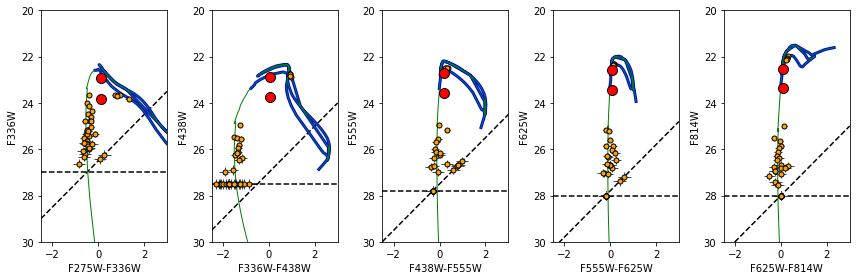

In [83]:
plt.close('all')
fig=plt.figure(figsize=[12, 4])
for ibd in range(len(bands)-1):
    ax=fig.add_subplot(1, len(bands)-1, ibd+1)
    bd1=bands[ibd]
    bd2=bands[ibd+1]
    ax.set_xlabel(bd1+'-'+bd2)
    ax.set_ylabel(bd2)
    ax.set_ylim(30, 20)
    ax.set_xlim(-2.5, 3)
    # stars
    mag1, err1 = magtab[bd1+'mag'], magtab[bd1+'err']
    mag2, err2 = magtab[bd2+'mag'], magtab[bd2+'err']
    ax.errorbar(mag1-mag2, mag2,
                xerr=np.sqrt(err1**2+err2**2), yerr=err2,
                fmt='o', mfc='orange', mec='k', markersize=5,
                ecolor='0.3', elinewidth=1.0)
    # test star
    ax.errorbar(mag1[jj]-mag2[jj], mag2[jj],
                xerr=np.sqrt(err1[jj]**2+err2[jj]**2), yerr=err2[jj],
                fmt='o', mfc='red', mec='k', markersize=10,
                ecolor='0.3', elinewidth=1.0)
    ax.errorbar(mag1[jj]-mag2[jj], mag2[jj]+5*err2[jj]+2.5*np.log10(2),
                xerr=np.sqrt(err1[jj]**2+err2[jj]**2), yerr=err2[jj],
                fmt='o', mfc='red', mec='k', markersize=10,
                ecolor='0.3', elinewidth=1.0)
    # limits
    ax.axhline(y=lims[bd2], linestyle='--', color='k')
    ax.plot([-2.5, 3], [lims[bd1]+2.5, lims[bd1]-3], linestyle='--', color='k')
    
    # isochrone
    # mag1=pt0[bd1+'mag']+int_coeff[bd1]*int_Av
    # mag2=pt0[bd2+'mag']+int_coeff[bd2]*int_Av
    # ax.plot(mag1-mag2, mag2, color='k')
    # newpt1
    mag1=newpt1[bd1+'mag']
    mag2=newpt1[bd2+'mag']
    ax.plot(mag1-mag2, mag2, linewidth=3, color='b')
    # newpt2
    mag1=newpt2[bd1+'mag']
    mag2=newpt2[bd2+'mag']
    ax.plot(mag1-mag2, mag2, linewidth=1, color='g')
    
fig.tight_layout()

In [84]:
# sampling
for bd in bands:
    print(bd, round(obs[bd+'err'], 4),
          np.around(np.amax(np.abs(newpt1[1:][bd+'mag']-newpt1[:-1][bd+'mag'])), 3))

F275W 0.0355 0.036
F336W 0.0292 0.03
F438W 0.0268 0.025
F555W 0.0236 0.024
F625W 0.0221 0.023
F814W 0.0204 0.021


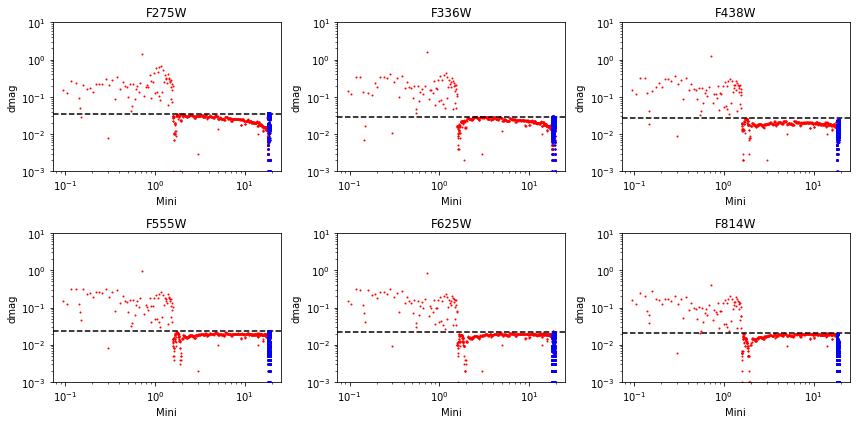

In [85]:
plt.close('all')
fig=plt.figure(figsize=[12, 6])
for ibd, bd in enumerate(bands):
    ax=fig.add_subplot(2, 3, ibd+1)
    ax.set_ylim(1e-3, 10)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('Mini')
    ax.set_ylabel('dmag')
    ax.set_title(bd)
    
    Ms=(newpt1[1:]['Mini']+newpt1[:-1]['Mini'])/2
    dmag=np.abs(newpt1[1:][bd+'mag']-newpt1[:-1][bd+'mag'])
    ax.scatter(Ms, dmag, s=1, color='b', zorder=10)
    
    Ms=(newpt2[1:]['Mini']+newpt2[:-1]['Mini'])/2
    dmag=np.abs(newpt2[1:][bd+'mag']-newpt2[:-1][bd+'mag'])
    ax.scatter(Ms, dmag, s=1, color='r')
    
    ax.axhline(y=obs[bd+'err'], linestyle='--', color='k')
    
fig.tight_layout()

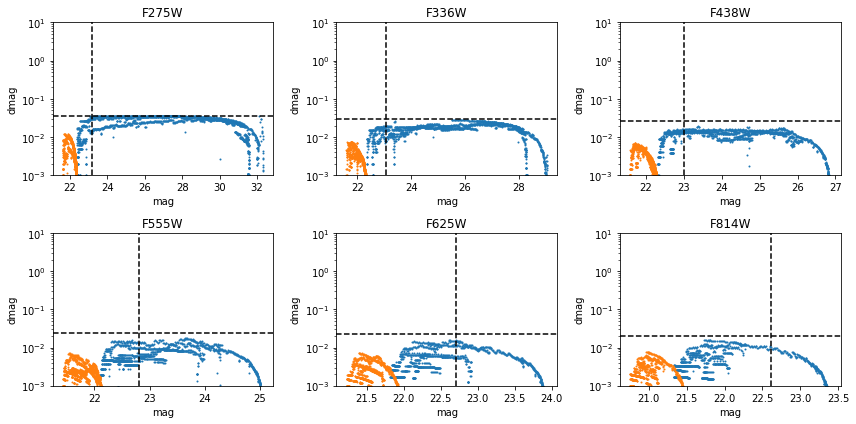

In [86]:
plt.close('all')
fig=plt.figure(figsize=[12, 6])
for ibd, bd in enumerate(bands):
    ax=fig.add_subplot(2, 3, ibd+1)
    ax.set_ylim(1e-3, 10)
    ax.set_yscale('log')
    ax.set_xlabel('mag')
    ax.set_ylabel('dmag')
    ax.set_title(bd)
    
    mag0=ps.addmag(np.amax(newpt1[bd+'mag']), newpt2[bd+'mag'])
    dmag=np.abs(mag0[1:]-mag0[:-1])
    mag0=(mag0[1:]+mag0[:-1])/2
    ax.scatter(mag0, dmag, s=1)
    
    mag0=ps.addmag(np.amin(newpt1[bd+'mag']), newpt2[bd+'mag'])
    dmag=np.abs(mag0[1:]-mag0[:-1])
    mag0=(mag0[1:]+mag0[:-1])/2
    ax.scatter(mag0, dmag, s=1)
    
    ax.axhline(y=obs[bd+'err'], linestyle='--', color='k')
    ax.axvline(x=obs[bd+'mag']+5*obs[bd+'err'], linestyle='--', color='k')
    
fig.tight_layout()

**get_ST_synmags**

In [87]:
(SSvec,
 TTvec,
 synmags_sin,
 synmags_bin) = pypopfit.get_ST_synmags(newpt1, newpt2, bands,
                                        maxMs[ii], AAs[ii], BBs[ii], CC0,
                                        Pbin=0.5, alpha=-2.35, minStellarMass=0.08)

In [88]:
mass1, mass2 = np.meshgrid(np.array(newpt1['Mini']), np.array(newpt2['Mini']))
print(mass1[0, 0:5])
print(mass2[0, 0:5])
print(mass1[0:5, 0])
print(mass2[0:5, 0])

[18.08481789 18.08490117 18.08498446 18.08506775 18.08515612]
[0.09 0.09 0.09 0.09 0.09]
[18.08481789 18.08481789 18.08481789 18.08481789 18.08481789]
[0.09       0.1        0.10853749 0.12472297 0.13812035]


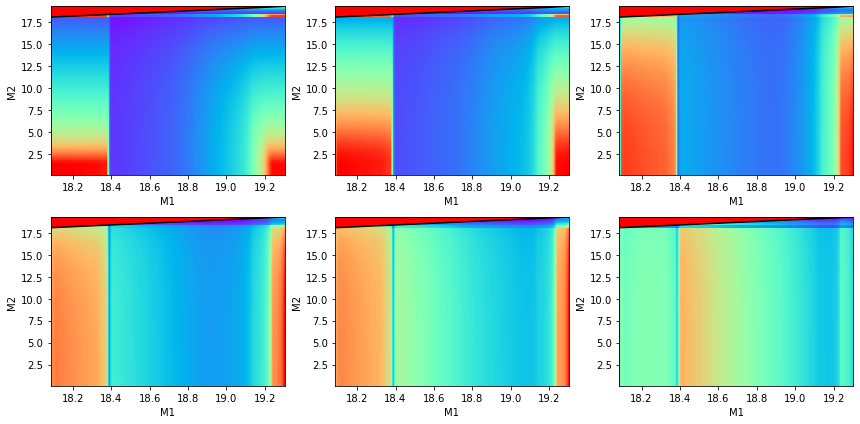

In [89]:
plt.close('all')
fig=plt.figure(figsize=[12, 6])
for ibd, bd in enumerate(bands):
    ax=fig.add_subplot(2, 3, ibd+1)
    ax.set_xlabel('M1')
    ax.set_ylabel('M2')
    ax.pcolormesh(newpt1['Mini'], newpt2['Mini'],
                  synmags_bin[bd],
                  vmin=np.amin(synmags_bin[bd][mass1>=mass2]),
                  vmax=np.amax(synmags_bin[bd][mass1>=mass2]),
                  cmap='rainbow')
    ax.plot([np.amin(newpt1['Mini']), np.amax(newpt1['Mini'])],
            [np.amin(newpt1['Mini']), np.amax(newpt1['Mini'])], color='k')
fig.tight_layout()

0.035989210726441456 0.0355
0.0258582868951045 0.0292
0.01920314727242811 0.0268
0.01653104789545523 0.0236
0.0155664941884055 0.0221
0.013412589493341898 0.0204


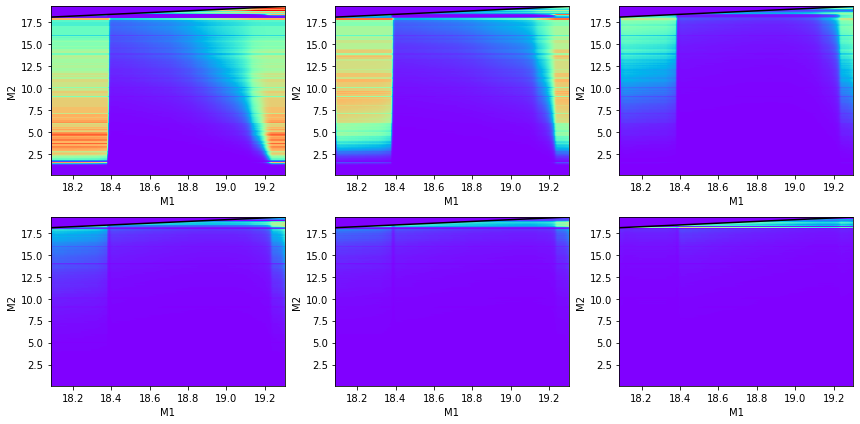

In [90]:
plt.close('all')
fig=plt.figure(figsize=[12, 6])
for ibd, bd in enumerate(bands):
    ax=fig.add_subplot(2, 3, ibd+1)
    ax.set_xlabel('M1')
    ax.set_ylabel('M2')
    
    mag=synmags_bin[bd]
    mag0=(mag[1:, :]+mag[:-1, :])/2
    dmag=np.abs(mag[1:, :]-mag[:-1, :])
    mm1=(mass1[1:, :]+mass1[:-1, :])/2
    mm2=(mass2[1:, :]+mass2[:-1, :])/2
    
    print(np.amax(dmag[np.logical_and(mm2<=mm1,
                                      mag0<obs[bd+'mag']+5*obs[bd+'err']+2.5*np.log10(2))]),
          obs[bd+'err'])
    
    M2=(newpt2[1:]['Mini']+newpt2[:-1]['Mini'])/2
    
    ax.pcolormesh(newpt1['Mini'], M2, dmag,
                  vmin=0.0, vmax=obs[bd+'err'], cmap='rainbow')
    ax.plot([np.amin(newpt1['Mini']), np.amax(newpt1['Mini'])],
            [np.amin(newpt1['Mini']), np.amax(newpt1['Mini'])], color='k')
    
fig.tight_layout()

0.035999999999663856 0.0355
0.01899999999715618 0.0292
0.016999999987426406 0.0268
0.01899999990646606 0.0236
0.022999999728394727 0.0221
0.0209999959409366 0.0204


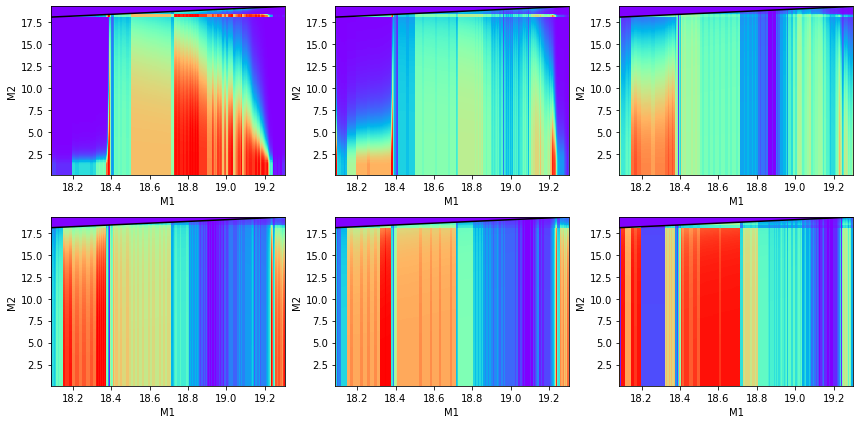

In [91]:
plt.close('all')
fig=plt.figure(figsize=[12, 6])
for ibd, bd in enumerate(bands):
    ax=fig.add_subplot(2, 3, ibd+1)
    ax.set_xlabel('M1')
    ax.set_ylabel('M2')
    
    mag=synmags_bin[bd]
    mag0=(mag[:, 1:]+mag[:, :-1])/2
    dmag=np.abs(mag[:, 1:]-mag[:, :-1])
    mm1=(mass1[:, 1:]+mass1[:, :-1])/2
    mm2=(mass2[:, 1:]+mass2[:, :-1])/2
    
    print(np.amax(dmag[np.logical_and(mm2<=mm1,
                                      mag0<obs[bd+'mag']+5*obs[bd+'err']+2.5*np.log10(2))]),
          obs[bd+'err'])
    
    M1=(newpt1[1:]['Mini']+newpt1[:-1]['Mini'])/2
    
    ax.pcolormesh(M1, newpt2['Mini'], dmag,
                  vmin=0.0, vmax=obs[bd+'err'], cmap='rainbow')
    ax.plot([np.amin(newpt1['Mini']), np.amax(newpt1['Mini'])],
            [np.amin(newpt1['Mini']), np.amax(newpt1['Mini'])], color='k')
fig.tight_layout()

In [92]:
kk1=14
kk2=35
for bd in bands:
    print(ps.addmag(newpt1[kk1][bd+'mag'], newpt2[kk2][bd+'mag'])-synmags_bin[bd][kk2, kk1])

0.0
0.0
0.0
0.0
0.0
0.0


**Likelihoods**

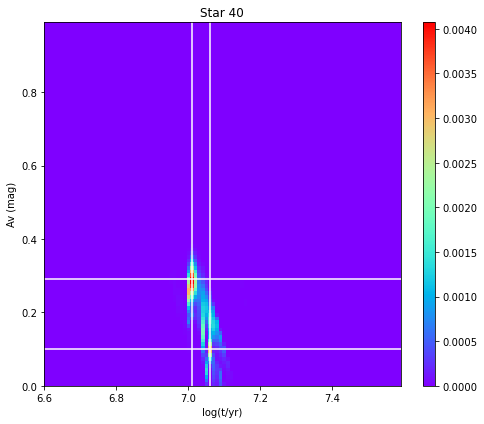

In [130]:
LH=ps.pload('../zzres1/4.dat')
plt.close('all')
fig=plt.figure(figsize=[7, 6]) 
ax=fig.add_subplot(111)
ax.set_title('Star '+str(ii))
ax.set_xlabel('log(t/yr)')
ax.set_ylabel('Av (mag)')
p=ax.imshow(np.transpose(LH),
    extent=[np.amin(LAs), np.amax(LAs), np.amin(Avs), np.amax(Avs)],
    origin='lower', cmap='rainbow', aspect='auto')
fig.colorbar(p, ax=ax, aspect=30)
ax.axvline(x=7.01, color='w')
ax.axhline(y=0.29, color='w')
ax.axvline(x=7.06, color='w')
ax.axhline(y=0.10, color='w')
fig.tight_layout()

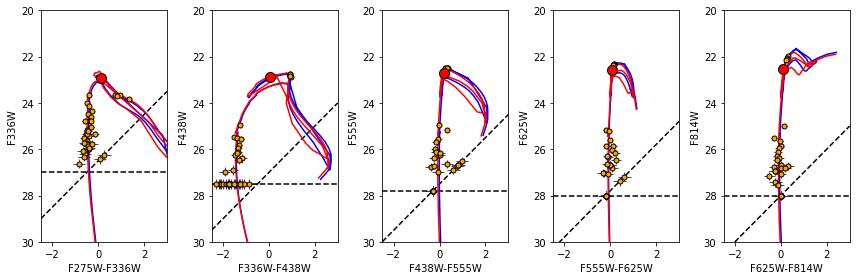

In [132]:
pt1=iso[np.abs(iso['logAge']-7.01)<1e-3]
int_Av1=0.29
pt2=iso[np.abs(iso['logAge']-7.06)<1e-3]
int_Av2=0.10

plt.close('all')
fig=plt.figure(figsize=[12, 4])
for ibd in range(len(bands)-1):
    ax=fig.add_subplot(1, len(bands)-1, ibd+1)
    bd1=bands[ibd]
    bd2=bands[ibd+1]
    ax.set_xlabel(bd1+'-'+bd2)
    ax.set_ylabel(bd2)
    ax.set_ylim(30, 20)
    ax.set_xlim(-2.5, 3)
    # stars
    mag1, err1 = magtab[bd1+'mag'], magtab[bd1+'err']
    mag2, err2 = magtab[bd2+'mag'], magtab[bd2+'err']
    ax.errorbar(mag1-mag2, mag2,
                xerr=np.sqrt(err1**2+err2**2), yerr=err2,
                fmt='o', mfc='orange', mec='k', markersize=5,
                ecolor='0.3', elinewidth=1.0)
    # test star
    ax.errorbar(mag1[jj]-mag2[jj], mag2[jj],
                xerr=np.sqrt(err1[jj]**2+err2[jj]**2), yerr=err2[jj],
                fmt='o', mfc='red', mec='k', markersize=10,
                ecolor='0.3', elinewidth=1.0)
    # limits
    ax.axhline(y=lims[bd2], linestyle='--', color='k')
    ax.plot([-2.5, 3], [lims[bd1]+2.5, lims[bd1]-3], linestyle='--', color='k')
    
    # isochrone-1
    mag1=pt1[bd1+'mag']+gal_coeff[bd1]*gal_Av+int_coeff[bd1]*int_Av1
    mag2=pt1[bd2+'mag']+gal_coeff[bd2]*gal_Av+int_coeff[bd2]*int_Av1
    ax.plot(mag1-mag2, mag2+DM, color='b')
    # isochrone-2
    mag1=pt2[bd1+'mag']+gal_coeff[bd1]*gal_Av+int_coeff[bd1]*int_Av2
    mag2=pt2[bd2+'mag']+gal_coeff[bd2]*gal_Av+int_coeff[bd2]*int_Av2
    ax.plot(mag1-mag2, mag2+DM, color='r')
    
fig.tight_layout()